# Assignment Objective
Build a model to predict the house prices using a Decision Tree Regressor

# Import Libraries

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import the dataset

In [47]:
# Import dataset as a pandas DataFrame
df = pd.read_excel('./dataset1.xlsx')

# Exploratory Data Analysis

## View 5 random samples

In [48]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16452,-122.11,37.41,33,1641,284.0,659,282,6.0884,432900,NEAR BAY
11537,-121.47,38.72,26,1708,299.0,911,290,4.0227,99800,INLAND
8493,-122.66,37.93,42,1505,324.0,553,277,4.1792,350000,NEAR OCEAN
9836,-117.86,33.74,38,2415,642.0,3242,599,3.4250,165600,<1H OCEAN
9612,-117.85,33.61,14,4340,741.0,1505,670,7.5674,500001,<1H OCEAN


## View the number of rows and columns in the dataset

In [49]:
df.shape

(18565, 10)

## View number of missing values in each column

In [50]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        189
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Drop rows that have missing values for total_bedrooms

In [51]:
# total_bedrooms has 189 missing values
# remove null values, as they are ,1% of datapoints
df = df.dropna()

In [52]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## View the distribution of features and target variable

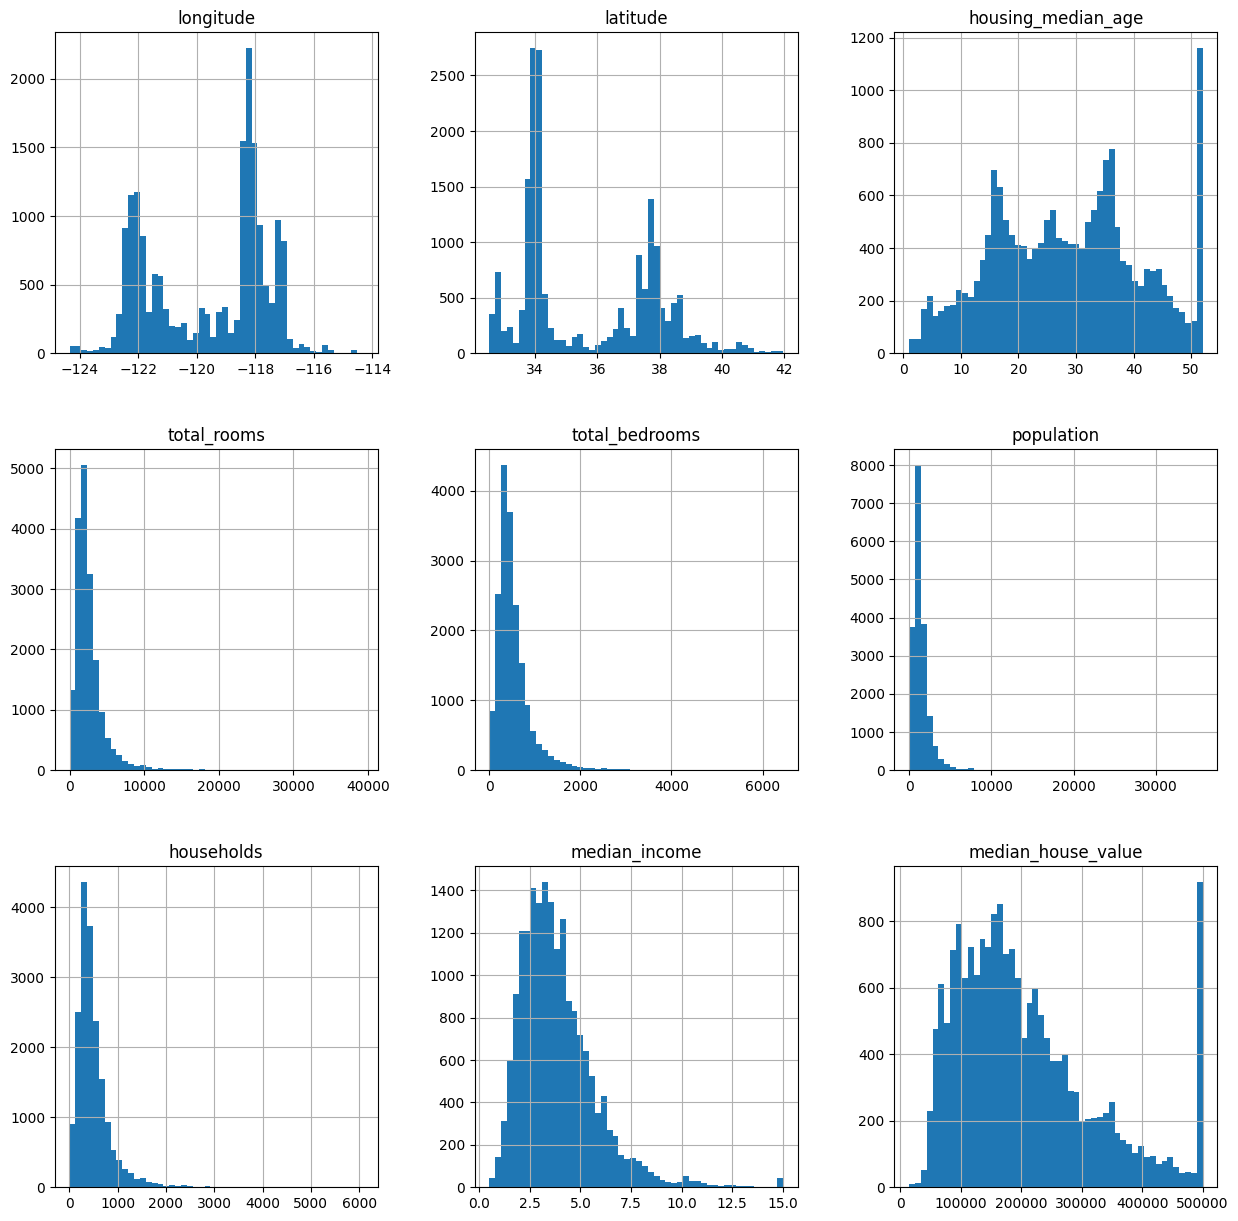

In [53]:
# View distribution of  variables
df.hist(bins=50, figsize=(15, 15))
plt.show()

## Target variable has outliers

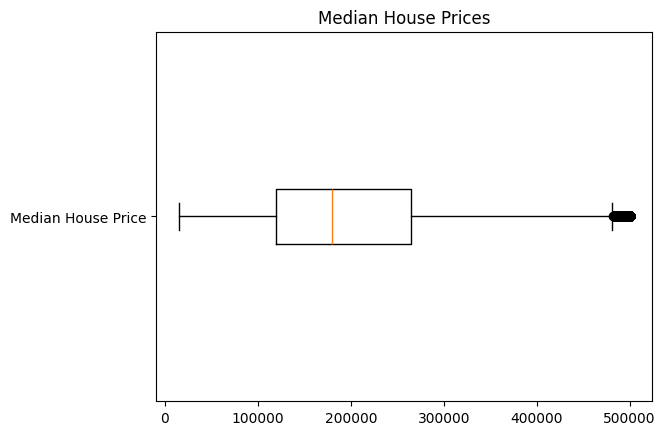

In [54]:
plt.boxplot(df['median_house_value'], tick_labels=['Median House Price'],vert=False) 
plt.title('Median House Prices') 
plt.show()

## Remove outliers in target variable

In [55]:
# Remove outliers
min_value = df['median_house_value'].min()
q1,q3 = np.percentile(df['median_house_value'],[25,75])
median = df['median_house_value'].median()
max_value = df['median_house_value'].max()
min_value,q1,q3,median,max_value

(14999, 119200.0, 264325.0, 179400.0, 500001)

In [56]:
iqr = q3-q1
lower_boundary = q1 - 1.5*iqr
upper_boundary = q3 + 1.5*iqr
range = [lower_boundary,upper_boundary]
range

[-98487.5, 482012.5]

In [57]:
# outliers
outlier = df[(df['median_house_value'] < lower_boundary) | (df['median_house_value']> upper_boundary)]
outlier

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
82,-122.27,37.80,52,249,78.0,396,85,1.2434,500001,NEAR BAY
414,-122.25,37.87,52,609,236.0,1349,250,1.1696,500001,NEAR BAY
444,-122.25,37.86,48,2153,517.0,1656,459,3.0417,489600,NEAR BAY
448,-122.24,37.86,52,1668,225.0,517,214,7.8521,500001,NEAR BAY
449,-122.24,37.85,52,3726,474.0,1366,496,9.3959,500001,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18366,-118.90,34.14,35,1503,263.0,576,216,5.1457,500001,<1H OCEAN
18370,-118.69,34.18,11,1177,138.0,415,119,10.0472,500001,<1H OCEAN
18371,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN
18380,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001,<1H OCEAN


In [58]:
df = df[(df['median_house_value'] > lower_boundary) & (df['median_house_value'] < upper_boundary)]

In [59]:
df.shape

(17419, 10)

## View the datatype of each column

In [60]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

## One-Hot Encoding for categorical variable

In [61]:
# One-Hot Encoding for ocean_proximity
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [62]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')
ohe_transform = encoder.fit_transform(df[['ocean_proximity']])
df = pd.concat([df,ohe_transform], axis=1).drop(columns=['ocean_proximity'])

In [63]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6920,-118.12,33.97,33,3099,839.0,2025,750,3.183,191100,1.0,0.0,0.0,0.0,0.0


## Setup validation framework: Split data into training & test sets

In [64]:
# Split data into train, test, split
y = df['median_house_value']

In [65]:
X = df.drop('median_house_value',axis=1)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [67]:
X_train.shape

(13935, 13)

In [68]:
X_test.shape

(3484, 13)

In [69]:
y_train.shape

(13935,)

In [70]:
y_test.shape

(3484,)

## Feature Scaling

In [71]:
# Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train a Decision Tree Regressor

In [72]:
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

In [73]:
# Fit the model to the training data.
dt_regressor.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [74]:
# Make predictions on the testing data.
y_pred = dt_regressor.predict(X_test_scaled)

# Evaluate Model Performance

In [75]:
dt_regressor.score(X_train_scaled,y_train)

0.6065523352783309

In [76]:
# cross validate model on train sample
from sklearn.model_selection import cross_validate
cross_validate(dt_regressor, X_train_scaled, y_train, cv=5)

{'fit_time': array([0.06090093, 0.03322911, 0.02669406, 0.02659392, 0.02649188]),
 'score_time': array([0.00083399, 0.00047684, 0.00038505, 0.00035119, 0.00034904]),
 'test_score': array([0.59333591, 0.58887685, 0.58783356, 0.58190358, 0.61567798])}

In [77]:
# Evaluate model on test sample
dt_regressor.score(X_test_scaled,y_test)

0.5799076981395742

In [78]:
# Model hyperparameters
dt_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [79]:
# Hyperparameter selection
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [80]:
# import pipeline
from sklearn.pipeline import Pipeline

In [81]:
# define pipe line
pipe = Pipeline([('model', dt_regressor)])

In [82]:
# grid search cv
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5)

In [83]:
grid

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__criterion': ['squared_error', 'absolute_error'], 'model__max_depth': [2, 3, ...], 'model__random_state': [2529]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [84]:
# train grid search
grid.fit(X_train_scaled,y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__criterion': ['squared_error', 'absolute_error'], 'model__max_depth': [2, 3, ...], 'model__random_state': [2529]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


In [85]:
# find best parama
grid.best_params_

{'model__criterion': 'absolute_error',
 'model__max_depth': 10,
 'model__random_state': 2529}

In [86]:
# select best estimator
best = grid.best_estimator_

In [87]:
# fit best estimator
best.fit(X_train_scaled,y_train)

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,criterion,'absolute_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None


In [88]:
# predict with best estimator
y_pred=best.predict(X_test_scaled)

In [89]:
# model error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [90]:
# mean absolute error
print(mean_absolute_error(y_test,y_pred))

36368.26980482204


In [91]:
# mean absolute percentage error
mean_absolute_percentage_error(y_test,y_pred)

0.20587945215751727

In [92]:
# r square
r2_score(y_test,y_pred)

0.6643583136028293

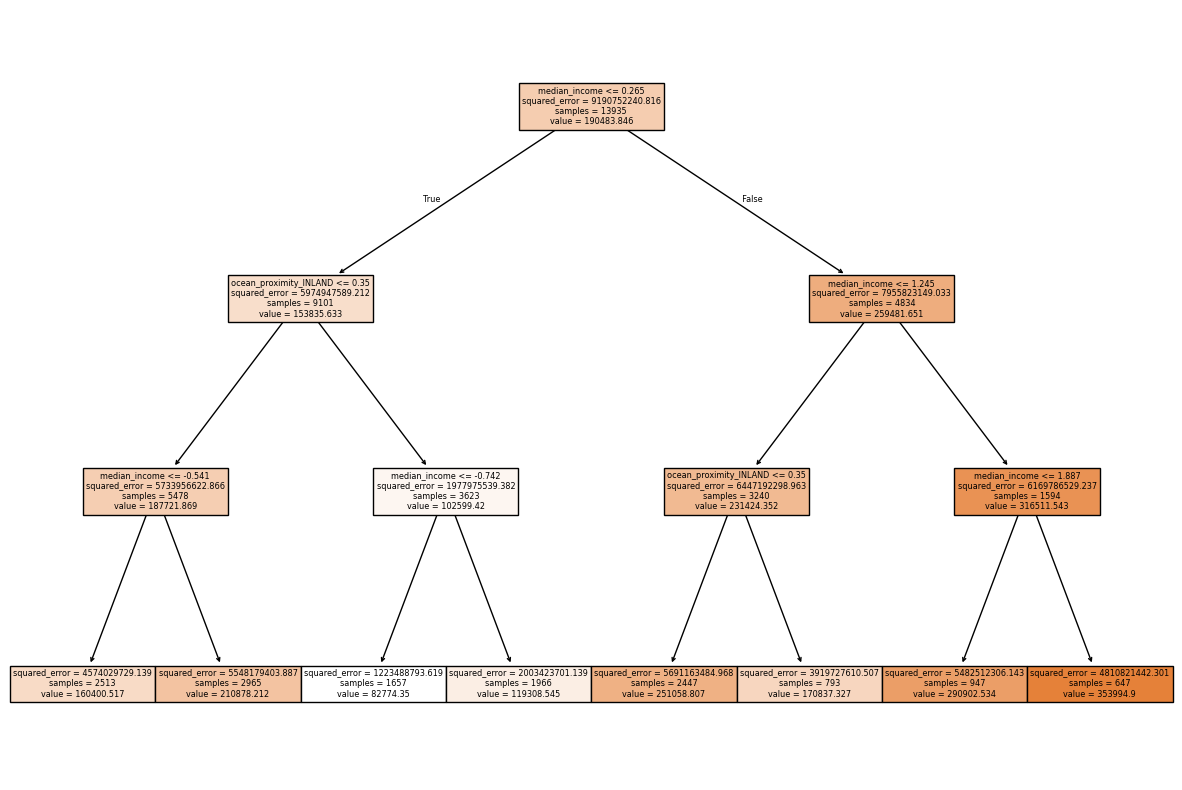

In [94]:
# plot tree
fig,ax = plt.subplots(figsize=(15,10))
final=DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train_scaled,y_train)
plot_tree(final,feature_names=X.columns,filled=True);

In [95]:
dt_regressor.predict(X_test_scaled)

array([195478.75695733, 143723.57343312, 133606.37254902, ...,
       179258.38323353, 104253.97225725, 179258.38323353])